## Prepare

### packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import scipy.stats as stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### data load

In [176]:
data = pd.read_csv('C:/Users/rsh15/Desktop/seunghuni/dataset/open data/open data/train.csv')
data.drop('index',axis=1,inplace=True)

In [177]:
data['voted'] = data['voted'].replace({1:1,2:0})

In [161]:
data['voted'].value_counts()

0    24898
1    20634
Name: voted, dtype: int64

In [3]:
data.shape
data.columns

(45532, 77)

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

## Basic Function

### plotting

In [179]:
def plotting_group(colname):
    dv1_func = data[data.voted==0].groupby([colname],as_index=False)['voted'].count()
    dv2_func = data[data.voted==1].groupby([colname],as_index=False)['voted'].count()
    dv1_func['type'] = 'voted_n'
    dv2_func['type'] = 'voted_y'
    dv_summ_func = pd.concat([dv1_func,dv2_func],axis=0)

    plt.figure(figsize=(18,8))
    sns.barplot(data=dv_summ_func,x=colname,y='voted',hue='type')
    plt.xticks(np.arange(len(dv_summ_func[colname].unique())),
               dv_summ_func[colname].unique())

In [180]:
def plotting_ratio(colname):
    dv1_func = data[data.voted==0].groupby([colname],as_index=False)['voted'].count()
    dv2_func = data[data.voted==1].groupby([colname],as_index=False)['voted'].count()

    func_1 = []
    func_2 = []
    for a,b in zip(dv1_func['voted'],data[data[colname].isin(dv1_func[colname])].groupby(colname)['voted'].count()):
        res = (a/b) * 100
        func_1.append(res)

    for d,e in zip(dv2_func['voted'],data[data[colname].isin(dv2_func[colname])].groupby(colname)['voted'].count()):
        res = (d/e) * 100
        func_2.append(res)

    dv1 = pd.DataFrame({colname:dv1_func[colname],'func_1':func_1})
    dv2 = pd.DataFrame({colname:dv2_func[colname],'func_2':func_2})
    dv_summ_func = pd.merge(dv1,dv2,how='outer',on=colname).replace(np.nan,0)

    fig,ax = plt.subplots(1,1,figsize=(18,8))
    dv_summ_func.plot(kind='bar',stacked=True,x=colname,y=['func_1','func_2'],fill=True,ax=ax)
    plt.xticks(np.arange(len(dv_summ_func[colname])),
               dv_summ_func[colname],
               rotation=0)
    plt.legend(['not_voted','voted'],loc='best')

### groupby count

In [181]:
def groupby_count(colname,if_sorted=True):
    dv1_func = data[data.voted==0].groupby([colname],as_index=False)['voted'].count()
    dv2_func = data[data.voted==1].groupby([colname],as_index=False)['voted'].count()

    func_1 = []
    valu_1 = []
    func_2 = []
    valu_2 = []
    for a,b in zip(dv1_func['voted'],data[data[colname].isin(dv1_func[colname])].groupby(colname)['voted'].count()):
        res = (a/b) * 100
        func_1.append(res)
        valu_1.append(a)

    for d,e in zip(dv2_func['voted'],data[data[colname].isin(dv2_func[colname])].groupby(colname)['voted'].count()):
        res = (d/e) * 100
        func_2.append(res)
        valu_2.append(d)

    dv1 = pd.DataFrame({colname:dv1_func[colname],'func_1':func_1,'valu_1':valu_1})
    dv2 = pd.DataFrame({colname:dv2_func[colname],'func_2':func_2,'valu_2':valu_2})
    dv_summ_func = pd.merge(dv1,dv2,how='outer',on=colname).fillna(0)
    
    if if_sorted == True:
        print(pd.DataFrame(dv_summ_func).sort_values(['func_1','func_2']))
    elif if_sorted == False:
        print(pd.DataFrame(dv_summ_func))
    else:
        print('error?')

## Data

### marci score

#### columns

In [170]:
col_pos = ['QbA','QcA','QhA','QjA','QmA','QoA','QsA']
pre_pos = ['QlA','QpA','QtA']
col_neg = ['QeA','QfA','QkA','QqA','QrA']
pre_neg = ['QaA','QdA','QgA','QiA','QnA']

In [171]:
marci_data = data.copy().loc[:,col_pos + pre_pos + col_neg + pre_neg]

<AxesSubplot:>

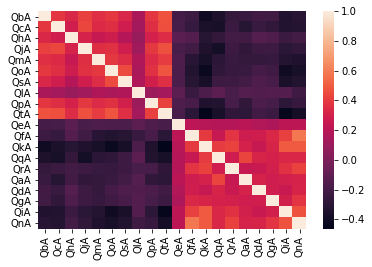

In [172]:
sns.heatmap(marci_data.corr())

#### just sum

In [132]:
marci_score = data.loc[:,col_pos+pre_pos+col_neg+pre_neg].sum(axis=1)

In [113]:
marci_comp = pd.DataFrame({'voted':data.voted,
                            'marci':marci_score})
marci_comp.groupby(['voted'],as_index=False)['marci'].mean()

,voted,marci
0,1,58.994475
1,2,59.803800


In [114]:
marci_score.min()
marci_score.max()

20.0

100.0

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='voted', ylabel='marci'>

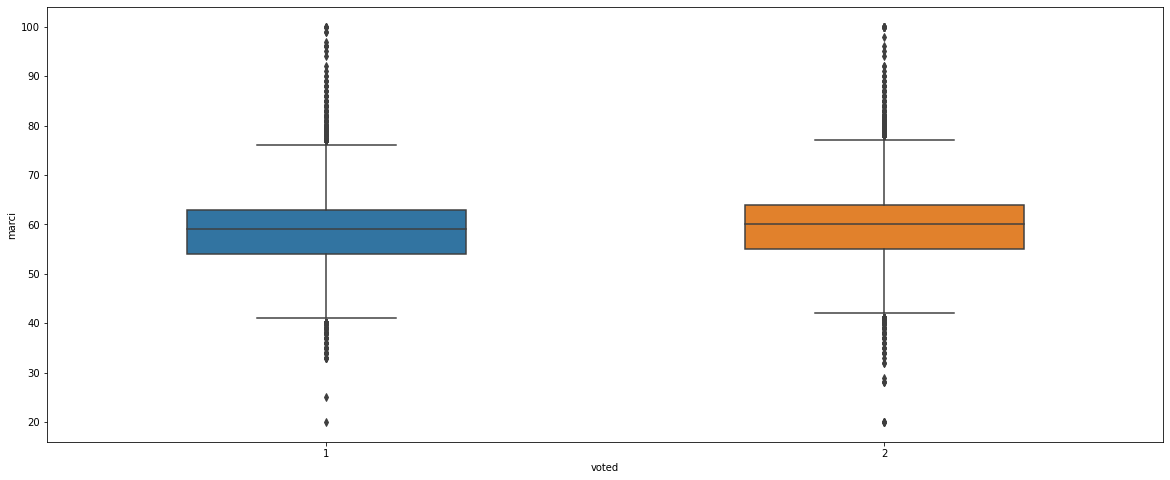

In [115]:
plt.figure(figsize=(20,8))
sns.boxplot(data=marci_comp,x='voted',y='marci',width=0.5)

#### reverse score with replacing

In [116]:
rep_idx = {1:5,2:4,3:3,4:2,5:1}

In [133]:
marci_neg = marci_data.loc[:,col_neg+pre_neg].replace(rep_idx)
marci_pos = marci_data.loc[:,col_pos+pre_pos]
marci_score2 = pd.concat([marci_neg,marci_pos],axis=1).sum(axis=1)

In [134]:
marci_score2

0        59.0
1        52.0
2        38.0
3        67.0
4        60.0
         ... 
45527    83.0
45528    76.0
45529    30.0
45530    58.0
45531    68.0
Length: 45532, dtype: float64

In [118]:
marci_score2.min()
marci_score2.max()

20.0

100.0

<AxesSubplot:>

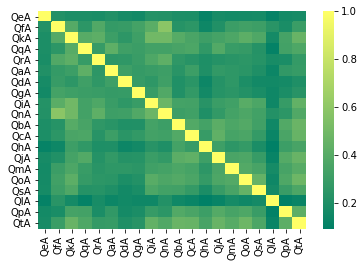

In [119]:
sns.heatmap(pd.concat([marci_neg,marci_pos],axis=1).corr(),cmap='summer')

In [17]:
marci_comp2 = pd.DataFrame({'voted':data.voted,
                            'marci':marci_score2})
marci_comp2.groupby(['voted'],as_index=False)['marci'].mean()

,voted,marci
0,1,65.265581
1,2,68.527874


<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='voted', ylabel='marci'>

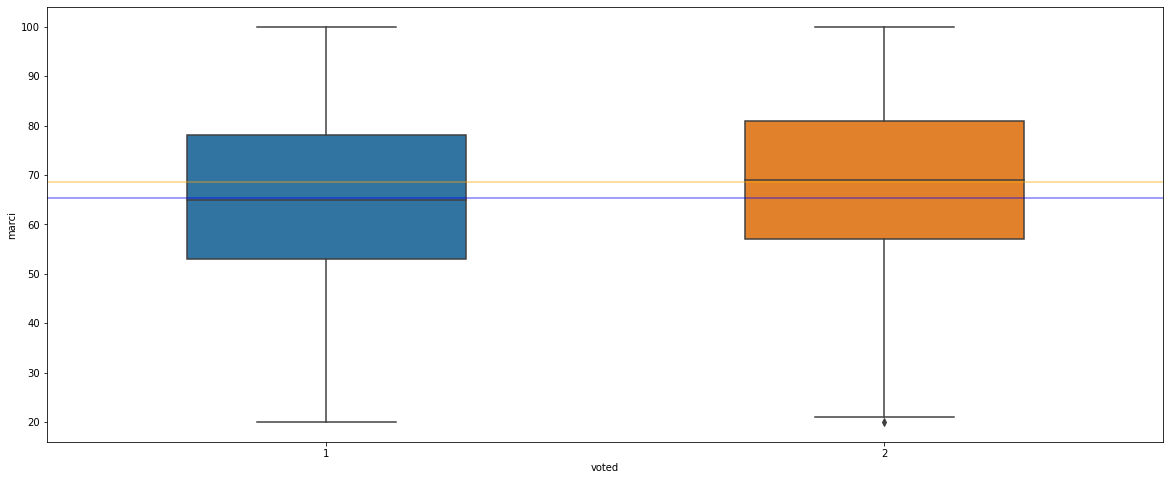

In [18]:
plt.figure(figsize=(20,8))
sns.boxplot(data=marci_comp2,x='voted',y='marci',width=0.5)
plt.axhline(y=65.265581, color='b', linestyle='-',alpha=0.5)
plt.axhline(y=68.527874, color='orange', linestyle='-',alpha=0.5)

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trans_marci = scaler.fit_transform(np.asarray(marci_score2).reshape(-1,1))

<AxesSubplot:>

<AxesSubplot:>

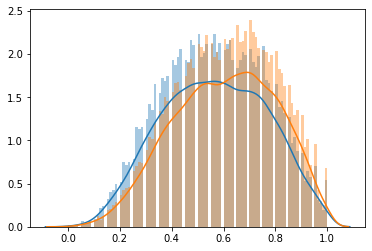

In [148]:
sns.distplot(trans_marci[data['voted']==1],bins=100)
sns.distplot(trans_marci[data['voted']==2],bins=100)

#### marci corr?

### marci score answer time

In [19]:
marci_time_col = data.columns[(pd.Series(data.columns).str.startswith('Q')) & (pd.Series(data.columns).str.endswith('E'))]
marci_time_row = data.loc[:,marci_time_col].mean(axis=1)

In [20]:
# + - 질문에 따른 voted 차이가 있을까?
plus_q_time = marci_data.loc[:,col_pos+pre_pos]
negg_q_time = marci_data.loc[:,col_neg+pre_neg]

In [21]:
plus_time = plus_q_time.mean(axis=1)
negg_time = negg_q_time.mean(axis=1)

<AxesSubplot:xlabel='voted'>

<AxesSubplot:xlabel='voted'>

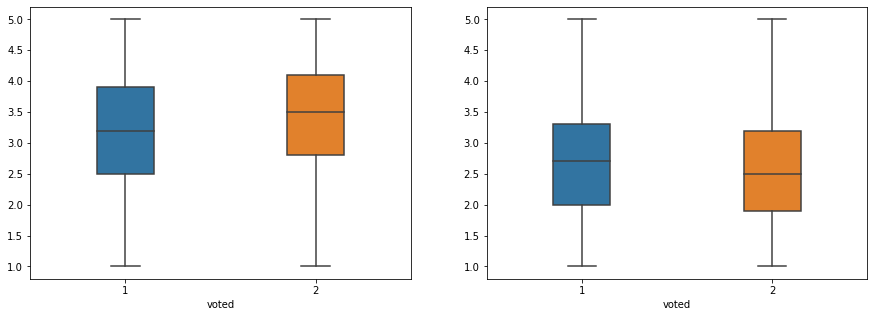

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x=data['voted'],y=plus_time,width=0.3,ax=ax[0])
sns.boxplot(x=data['voted'],y=negg_time,width=0.3,ax=ax[1])

### basic data preprocessing

In [23]:
# gender text to numeric
data['gender'] = data['gender'].replace('Female',0).replace('Male',1)

### age

In [178]:
# age_group to order number
age_dict = {'10s':0,'20s':1,'30s':2,'40s':3,'50s':4,'60s':5,'+70s':6}
data['age_group'] = data['age_group'].replace(age_dict)

   age_group     func_1  valu_1     func_2  valu_2
6          6  26.382979      62  73.617021     173
5          5  27.135678     324  72.864322     870
4          4  32.987193     953  67.012807    1936
3          3  35.794892    1808  64.205108    3243
2          2  41.117917    3222  58.882083    4614
1          1  46.967120    6628  53.032880    7484
0          0  83.721421   11901  16.278579    2314


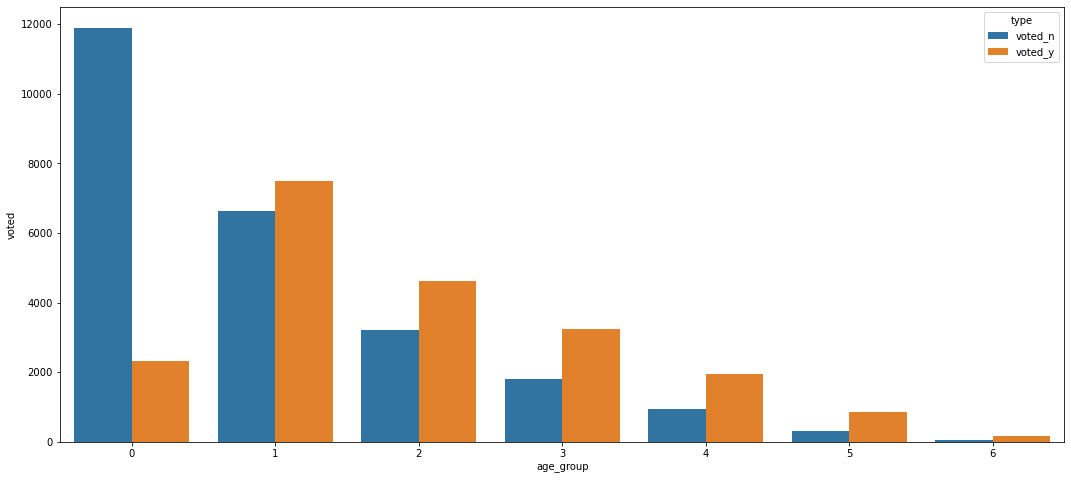

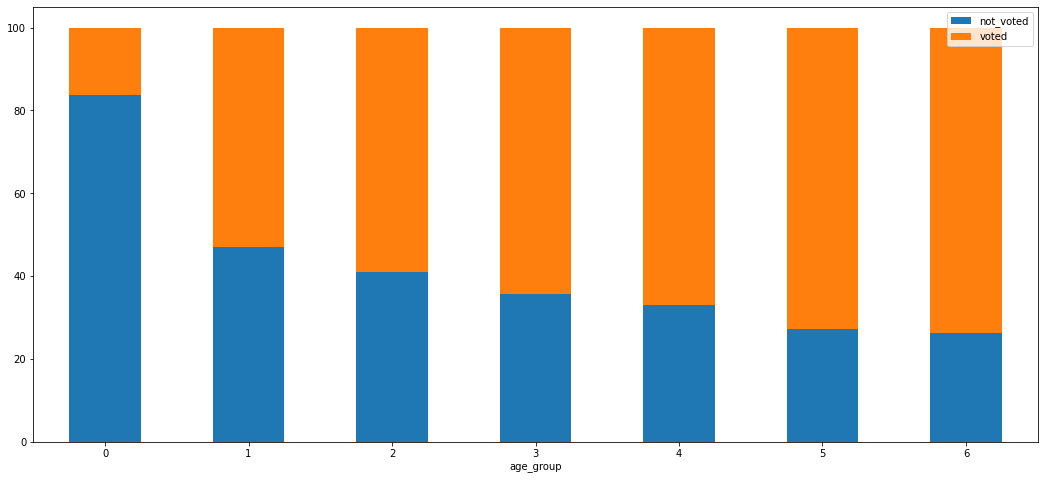

In [182]:
groupby_count('age_group')
plotting_group('age_group')
plotting_ratio('age_group')

C:\Users\rsh15\anaconda3\envs\simon_env\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


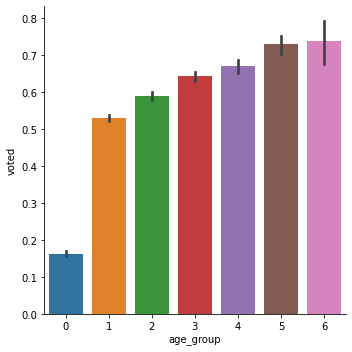

In [166]:
sns.factorplot(data=data,x='age_group',y='voted',kind='bar')

### familysize

    familysize      func_1  valu_1      func_2  valu_2
0            0   41.331142   503.0   58.668858   714.0
1            1   42.433053  2773.0   57.566947  3762.0
2            2   45.010604  8065.0   54.989396  9853.0
3            3   45.691187  5143.0   54.308813  6113.0
4            4   48.339107  2372.0   51.660893  2535.0
5            5   48.165138   945.0   51.834862  1017.0
6            6   46.420048   389.0   53.579952   449.0
7            7   51.937984   201.0   48.062016   186.0
8            8   43.891403    97.0   56.108597   124.0
9            9   47.619048    60.0   52.380952    66.0
10          10   47.457627    28.0   52.542373    31.0
11          11   56.410256    22.0   43.589744    17.0
12          12   52.380952    11.0   47.619048    10.0
13          13   63.636364     7.0   36.363636     4.0
14          14   55.555556     5.0   44.444444     4.0
15          15   62.500000     5.0   37.500000     3.0
16          17  100.000000     3.0    0.000000     0.0
17        

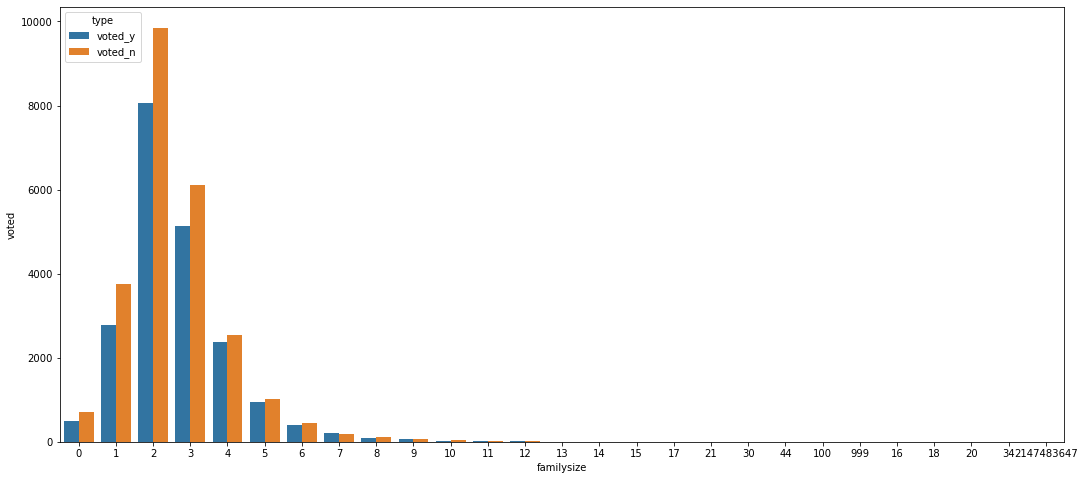

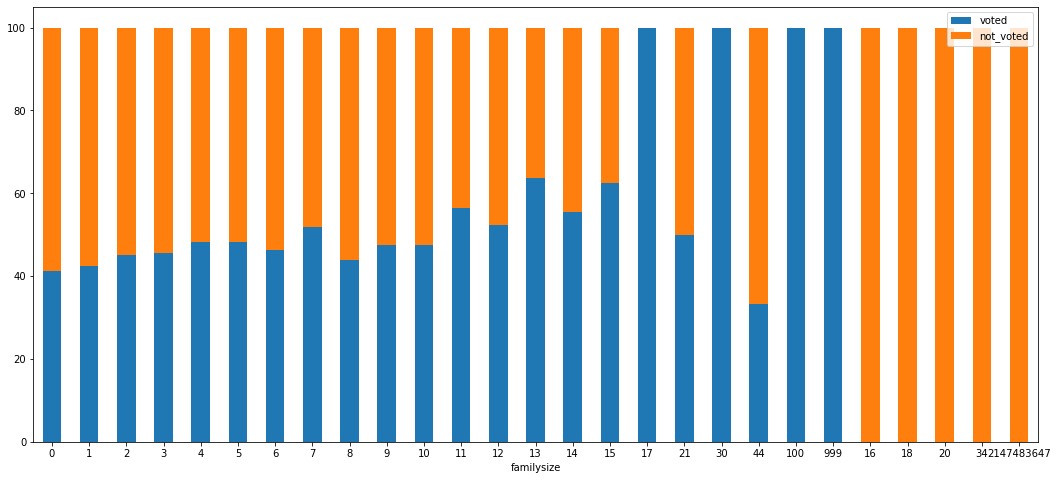

In [28]:
groupby_count('familysize',if_sorted=False)
plotting_group('familysize')
plotting_ratio('familysize')

In [152]:
fam_co = np.where(data['familysize']>5,1,0).tolist()

C:\Users\rsh15\anaconda3\envs\simon_env\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


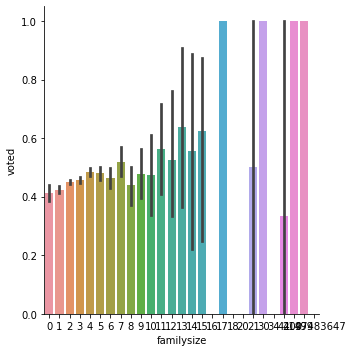

In [183]:
sns.factorplot(x='familysize',y='voted',data=data,kind='bar')

In [185]:
famsize_log = data['familysize'].map(lambda k:np.log(k) if k > 0 else 0)

<AxesSubplot:xlabel='familysize'>

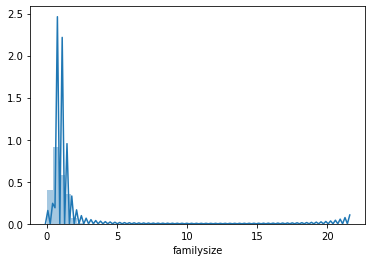

In [186]:
sns.distplot(famsize_log)

In [198]:
data[['familysize','voted']].groupby('familysize').agg(['mean','count'])

voted       
                mean  count
familysize                 
0           0.413311   1217
1           0.424331   6535
2           0.450106  17918
3           0.456912  11256
4           0.483391   4907
5           0.481651   1962
6           0.464200    838
7           0.519380    387
8           0.438914    221
9           0.476190    126
10          0.474576     59
11          0.564103     39
12          0.523810     21
13          0.636364     11
14          0.555556      9
15          0.625000      8
16          0.000000      2
17          1.000000      3
18          0.000000      1
20          0.000000      2
21          0.500000      2
30          1.000000      1
34          0.000000      1
44          0.333333      3
100         1.000000      1
999         1.000000      1
2147483647  0.000000      1

In [227]:
data['fam_single'] = data['familysize'].map(lambda k: 1 if k == 0 else 0)
data['fam_small']  = data['familysize'].map(lambda k: 1 if k < 5  else 0)
data['fam_co']     = data['familysize'].map(lambda k: 1 if 0 < k <= 6 else (0 if k == 0 else 2))

(0.0, 0.5)

(0.0, 0.5)

(0.0, 0.6)

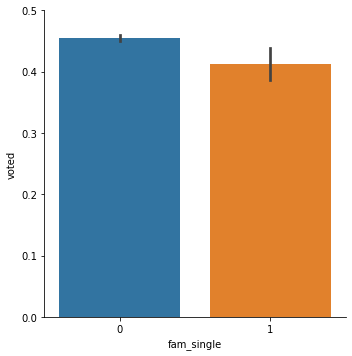

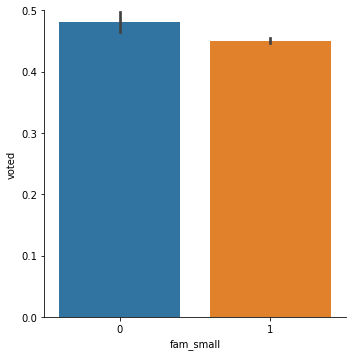

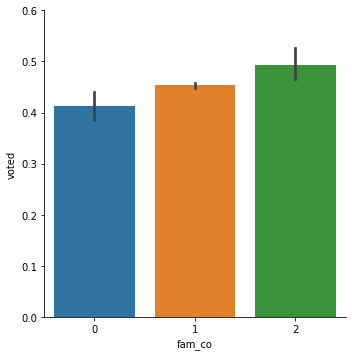

In [230]:
sns.factorplot(data=data,x='fam_single',y='voted',kind='bar')
plt.ylim(0.0,0.5)
sns.factorplot(data=data,x='fam_small',y='voted',kind='bar')
plt.ylim(0.0,0.5)
sns.factorplot(data=data,x='fam_co',y='voted',kind='bar')
plt.ylim(0.0,0.6)

In [208]:
data['fam_small'].value_counts()

1    42578
2     1737
0     1217
Name: fam_small, dtype: int64

In [225]:
data['fam_co'].value_counts()

1    42578
2     1737
0     1217
Name: fam_co, dtype: int64

### gender

   gender     func_1  valu_1     func_2  valu_2
1       1  44.679357   10820  55.320643   13397
0       0  46.042693    9814  53.957307   11501


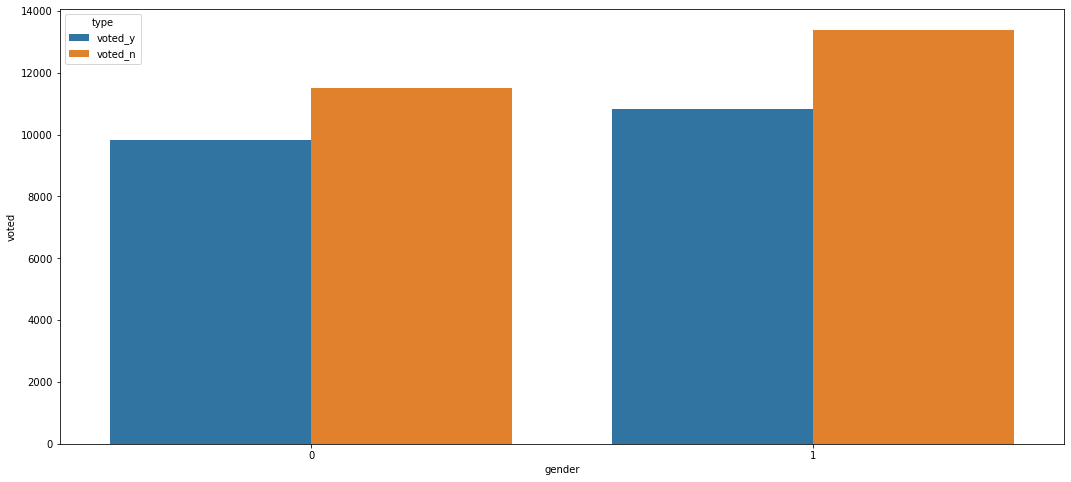

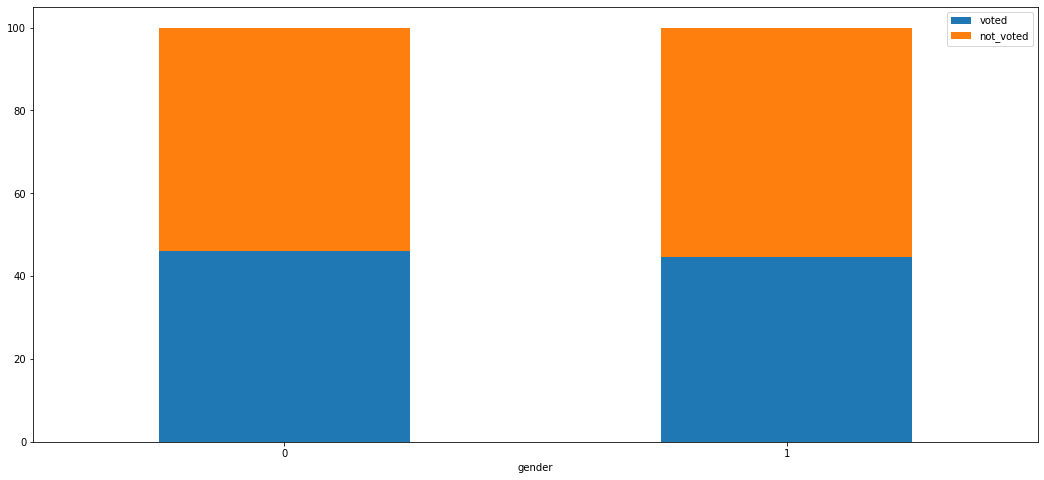

In [29]:
groupby_count('gender')
plotting_group('gender')
plotting_ratio('gender')

<AxesSubplot:xlabel='gender', ylabel='voted'>

(0.0, 0.5)

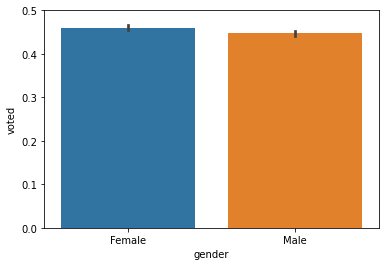

In [191]:
sns.barplot(data=data,x='gender',y='voted')
plt.ylim(0.0,0.5)

In [192]:
data[['gender','voted']].groupby('gender').mean()

,voted
gender,
Female,0.460427
Male,0.446794


### education

   education     func_1  valu_1     func_2  valu_2
1          1   4.972484     253  95.027516    4835
2          2  36.703297    6179  63.296703   10656
0          0  47.727273     252  52.272727     276
3          3  59.650621    9083  40.349379    6144
4          4  61.968424    4867  38.031576    2987


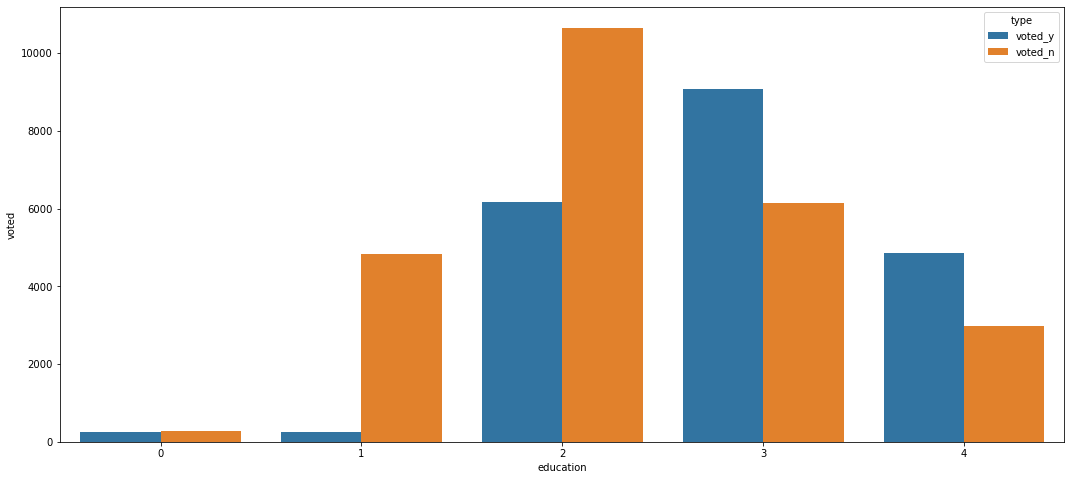

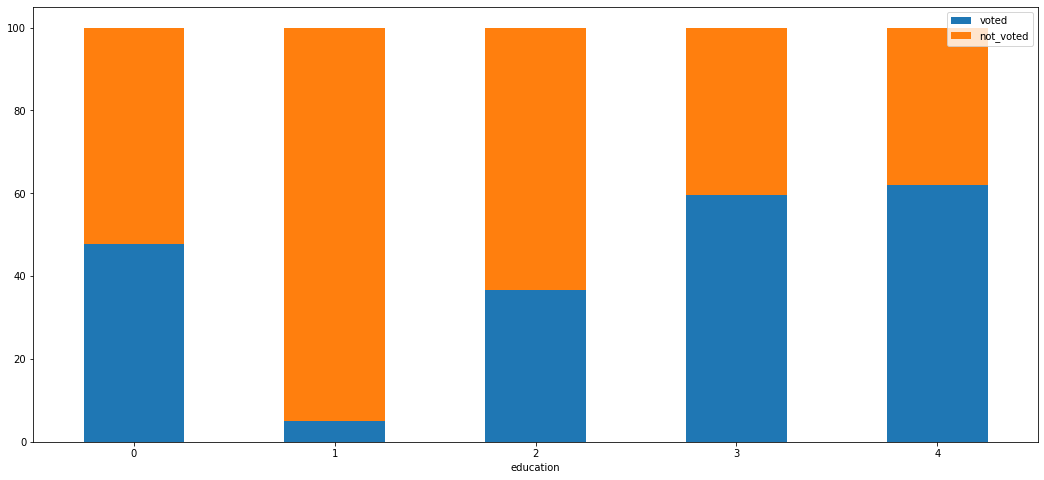

In [30]:
groupby_count('education')
plotting_group('education')
plotting_ratio('education')

In [193]:
data[['education','voted']].groupby('education').mean()

,voted
education,
0,0.477273
1,0.049725
2,0.367033
3,0.596506
4,0.619684


#### after college or not?

In [31]:
college = np.where(data['education'] >= 3,1,0)
np.unique(college,return_counts=True)

(array([0, 1]), array([22451, 23081], dtype=int64))

<AxesSubplot:ylabel='voted'>

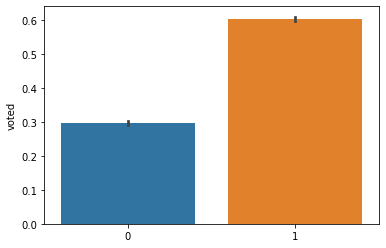

In [32]:
sns.barplot(x=college,y=vote_coded,estimator=np.mean)

### engnat

   engnat     func_1  valu_1     func_2  valu_2
0       0  37.662338      29  62.337662      48
2       2  42.860590    5328  57.139410    7103
1       1  46.260296   15277  53.739704   17747


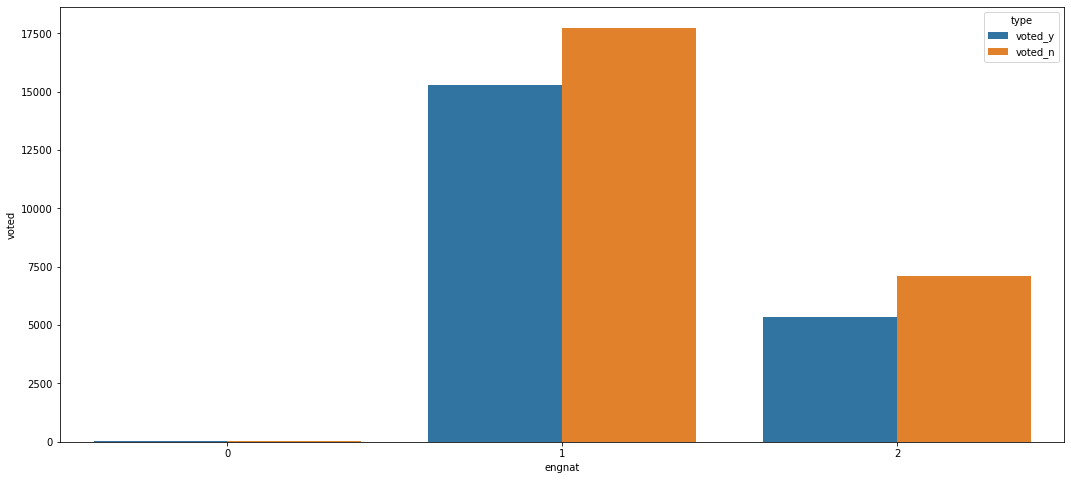

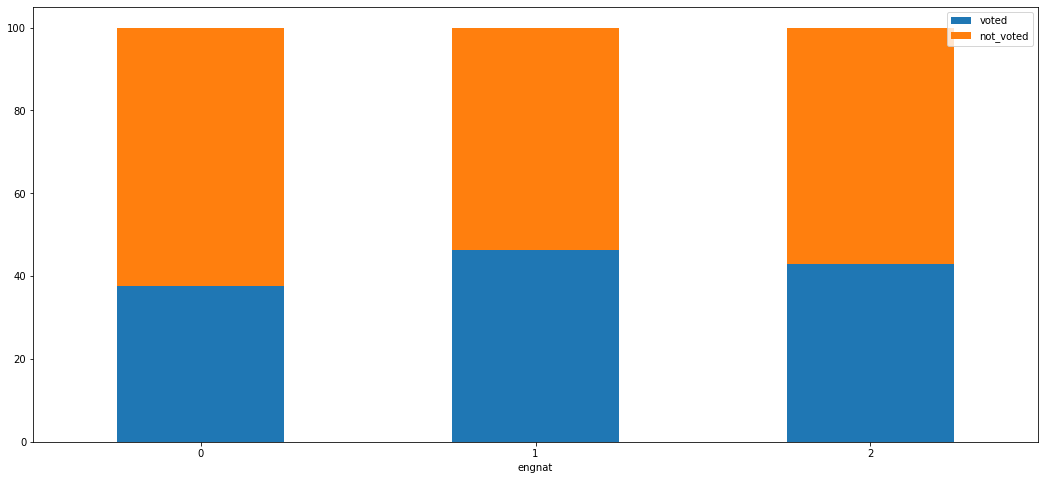

In [33]:
groupby_count('engnat')
plotting_group('engnat')
plotting_ratio('engnat')

### hand

   hand     func_1  valu_1     func_2  valu_2
0     0  36.645963      59  63.354037     102
3     3  40.715608     660  59.284392     961
1     1  45.468278   17759  54.531722   21299
2     2  45.950554    2156  54.049446    2536


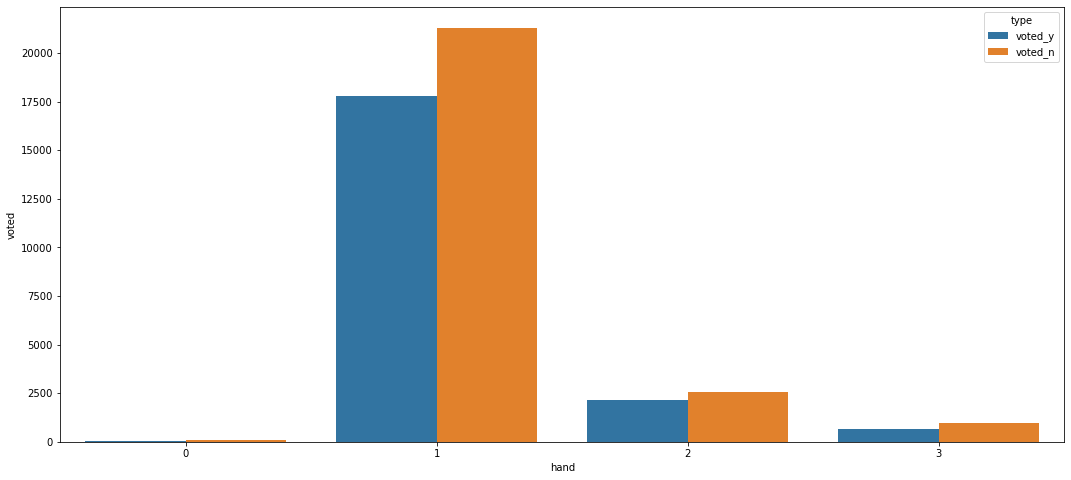

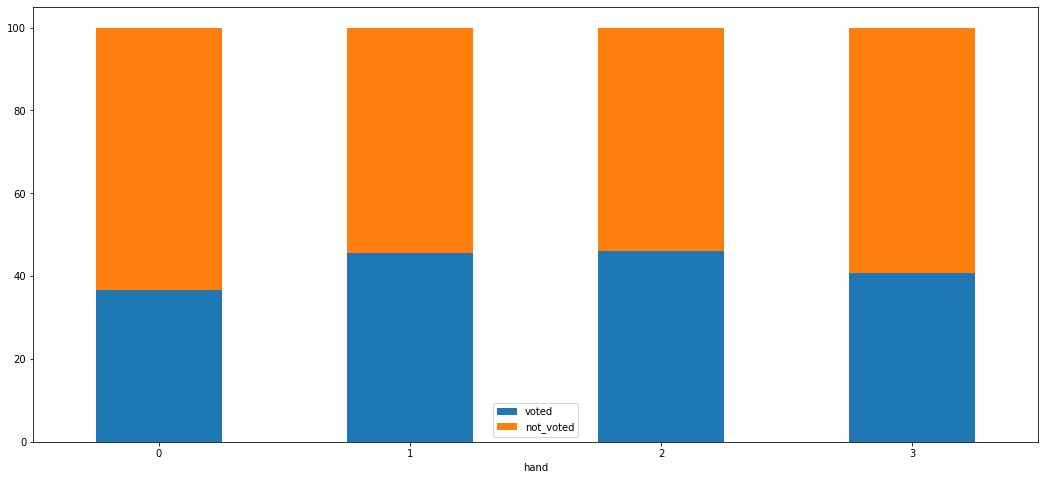

In [34]:
groupby_count('hand')
plotting_group('hand')
plotting_ratio('hand')

#### hand dummies

In [35]:
hand_dummy = pd.get_dummies(data['hand'])
hand_dummy.columns = ['hand_noans','hand_right','hand_left','hand_both']
hand_dummy.head()

,hand_noans,hand_right,hand_left,hand_both
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


### married

   married     func_1  valu_1     func_2  valu_2
0        0  32.258065      30  67.741935      63
1        1  37.042789   11687  62.957211   19863
3        3  57.754569    2212  42.245431    1618
2        2  66.656725    6705  33.343275    3354


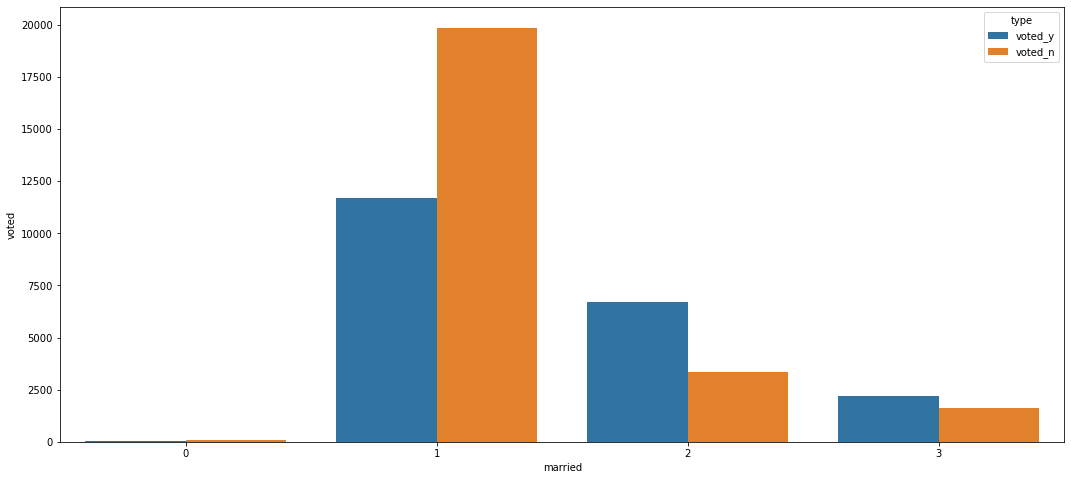

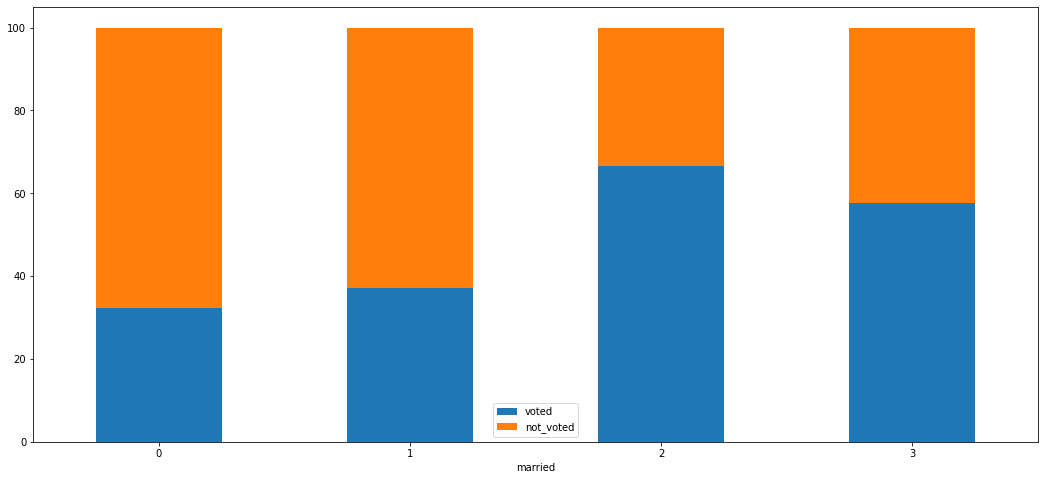

In [36]:
groupby_count('married')
plotting_group('married')
plotting_ratio('married')

#### ever married?

In [37]:
ever_married = np.where(data['married'].isin([0,1]),0,1)
np.unique(ever_married,return_counts=True)

(array([0, 1]), array([31643, 13889], dtype=int64))

In [38]:
data[data.voted==1].groupby(ever_married[data.voted==1],as_index=False)['voted'].count()
data[data.voted==2].groupby(ever_married[data.voted==2],as_index=False)['voted'].count()

,voted
0,11717
1,8917


,voted
0,19926
1,4972


### race

                    race     func_1  valu_1     func_2  valu_2
0                   Arab  29.059829     102  70.940171     249
1                  Asian  29.543459    2019  70.456541    4815
5                  Other  37.759815    1635  62.240185    2695
2                  Black  40.221402     872  59.778598    1296
4        Native American  41.240876     226  58.759124     322
3  Indigenous Australian  45.283019      24  54.716981      29
6                  White  50.422427   15756  49.577573   15492


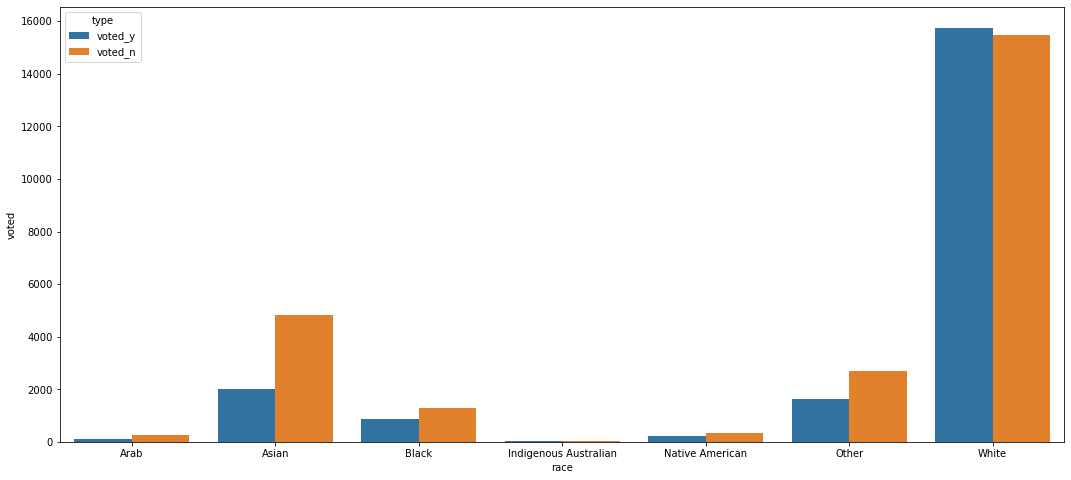

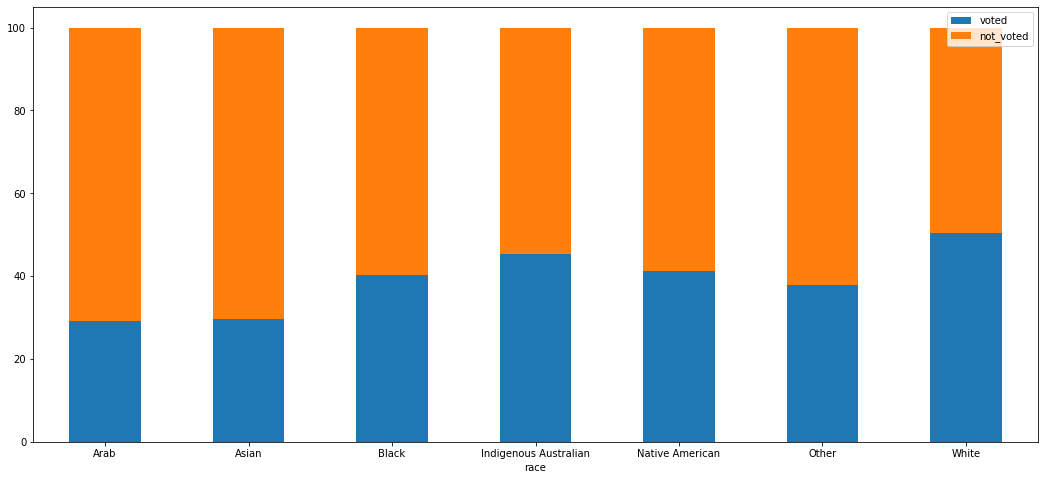

In [39]:
groupby_count('race')
plotting_group('race')
plotting_ratio('race')

In [40]:
np.where(data['race']=='White')

(array([    0,     2,     4, ..., 45529, 45530, 45531], dtype=int64),)

### religion

                religion     func_1  valu_1     func_2  valu_2
9                 Muslim  31.291946     373  68.708054     819
11                  Sikh  35.897436      42  64.102564      75
2               Buddhist  37.882353     322  62.117647     528
4       Christian_Mormon  38.084112     163  61.915888     265
7                  Hindu  38.698390     553  61.301610     876
10                 Other  41.719078    1990  58.280922    2780
1                Atheist  42.729592    4355  57.270408    5837
0               Agnostic  45.739817    4402  54.260183    5222
5        Christian_Other  46.038544    2365  53.961456    2772
3     Christian_Catholic  47.348779    3045  52.651221    3386
8                 Jewish  55.030801     268  44.969199     219
6   Christian_Protestant  56.533333    2756  43.466667    2119


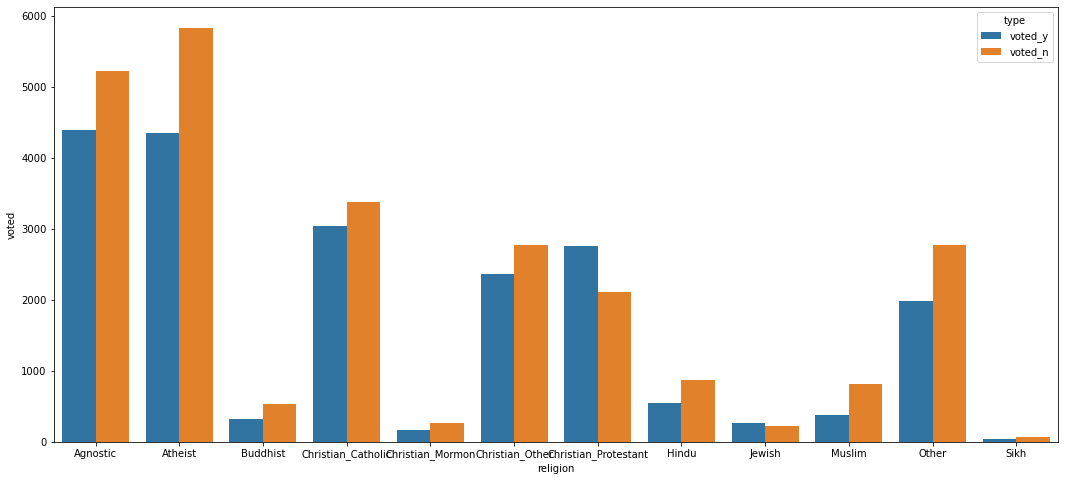

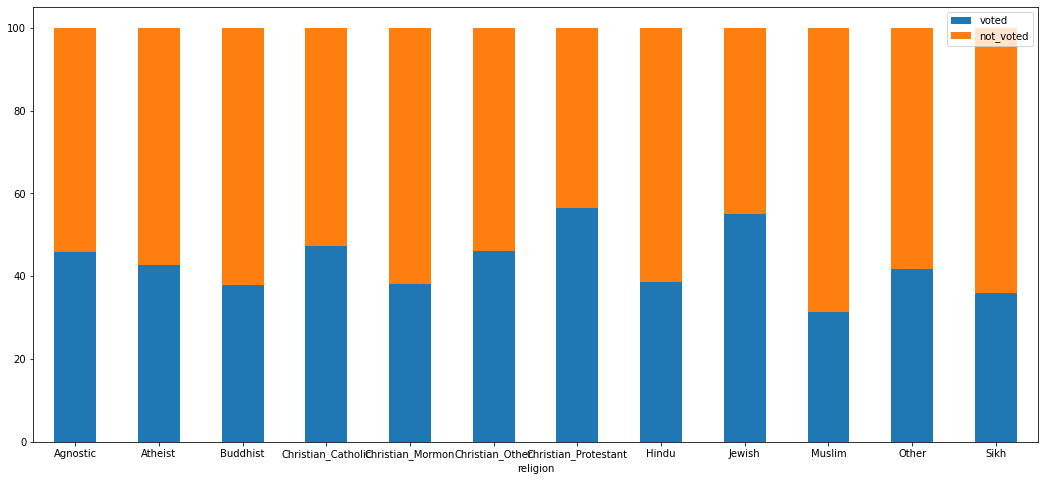

In [41]:
groupby_count('religion')
plotting_group('religion')
plotting_ratio('religion')

In [42]:
religion_if_philo = np.where(data['religion'].str.startswith(('Christian','Jewish')),1,2).astype(int)
data[data.voted==1].groupby([religion_if_philo[data.voted==1]],as_index=False)['voted'].count()
data[data.voted==2].groupby([religion_if_philo[data.voted==2]],as_index=False)['voted'].count()

,voted
0,8597
1,12037


,voted
0,8761
1,16137


### tp_

<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

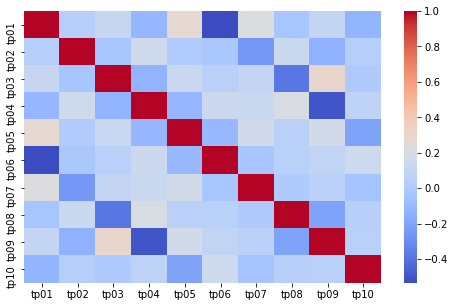

In [43]:
cor_df = data[data.columns[data.columns.str.startswith('tp')]]

plt.figure(figsize=(8,5))
sns.heatmap(cor_df.corr(),cmap='coolwarm')

#### remove all 7

<AxesSubplot:>

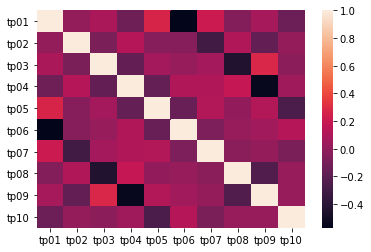

In [44]:
sns.heatmap(cor_df[(cor_df==7).sum(axis=1)==0].corr())

In [46]:
# - Extraversion: 1, 6R; 
# - Agreeableness: 2R, 7; 
# - Conscientiousness; 3, 8R; 
# - Emotional Stability: 4R, 9;
# - Openness to Experiences: 5, 10R.

In [47]:
tp_idx = {0:6, 1:5, 2:4, 3:3, 4:2, 5:1, 6:0}

In [48]:
tp_rm7[['tp02','tp04','tp06','tp08','tp10']] = tp_rm7[['tp02','tp04','tp06','tp08','tp10']].replace(tp_idx)
tp_rm7.head(3)

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
extraversion = (tp_rm7['tp01'] + tp_rm7['tp06'])/2
agreeable = (tp_rm7['tp02'] + tp_rm7['tp07'])/2
conscientious = (tp_rm7['tp03'] + tp_rm7['tp08'])/2
emotional = (tp_rm7['tp04'] + tp_rm7['tp09'])/2
openess = (tp_rm7['tp05'] + tp_rm7['tp10'])/2

In [50]:
extraversion.mean()
agreeable.mean()
conscientious.mean()
emotional.mean()
openess.mean()

7.0

7.0

7.0

7.0

7.0

#### knn imputation

In [51]:
tp_knn_copy = data.copy().loc[:,data.columns.str.startswith('tp')]
tp_knn_copy[tp_knn_copy==7] = np.NaN

In [52]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
knn_tp = round(pd.DataFrame(imputer.fit_transform(tp_knn_copy),columns=tp_knn_copy.columns))
knn_tp.head()

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,4.0,3.0
1,1.0,1.0,0.0,0.0,1.0,2.0,3.0,4.0,0.0,4.0
2,2.0,3.0,1.0,5.0,3.0,4.0,2.0,6.0,1.0,3.0
3,2.0,4.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0
4,1.0,1.0,1.0,6.0,0.0,2.0,0.0,6.0,2.0,6.0


In [53]:
knn_tp

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,4.0,3.0
1,1.0,1.0,0.0,0.0,1.0,2.0,3.0,4.0,0.0,4.0
2,2.0,3.0,1.0,5.0,3.0,4.0,2.0,6.0,1.0,3.0
3,2.0,4.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0
4,1.0,1.0,1.0,6.0,0.0,2.0,0.0,6.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...
45527,1.0,2.0,6.0,1.0,2.0,6.0,3.0,0.0,6.0,4.0
45528,2.0,2.0,2.0,3.0,1.0,3.0,3.0,4.0,1.0,5.0
45529,4.0,4.0,2.0,4.0,0.0,1.0,0.0,2.0,1.0,6.0
45530,1.0,2.0,0.0,4.0,0.0,1.0,3.0,2.0,2.0,4.0


In [54]:
extraversion_knn = (knn_tp['tp01'] + knn_tp['tp06'])/2
agreeable_knn = (knn_tp['tp02'] + knn_tp['tp07'])/2
conscientious_knn = (knn_tp['tp03'] + knn_tp['tp08'])/2
emotional_knn = (knn_tp['tp04'] + knn_tp['tp09'])/2
openess_knn = (knn_tp['tp05'] + knn_tp['tp10'])/2

#### tp

In [74]:
data.loc[:,data.columns.str.startswith('tp')] = 7-data.loc[:,data.columns.str.startswith('tp')]

### urban

   urban     func_1  valu_1     func_2  valu_2
3      3  41.959813    7455  58.040187   10312
2      2  45.845473    8497  54.154527   10037
1      1  50.712762    4518  49.287238    4391
0      0  50.931677     164  49.068323     158


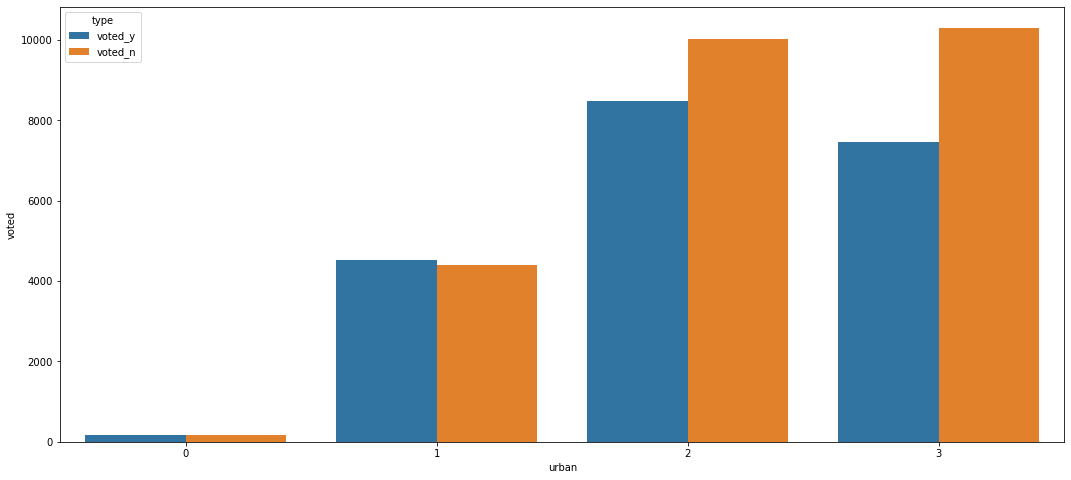

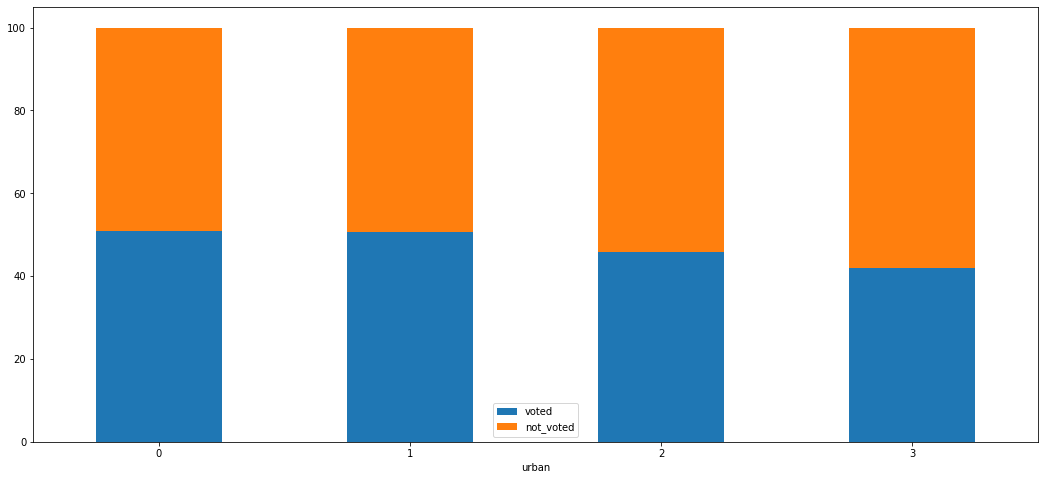

In [56]:
groupby_count('urban')
plotting_group('urban')
plotting_ratio('urban')

### wr_

In [64]:
wr_agg = data.loc[:,data.columns.str.startswith('wr_')].mean(axis=1)
wf_agg = data.loc[:,data.columns.str.startswith('wf_')].mean(axis=1)

<AxesSubplot:xlabel='voted'>

<AxesSubplot:xlabel='voted'>

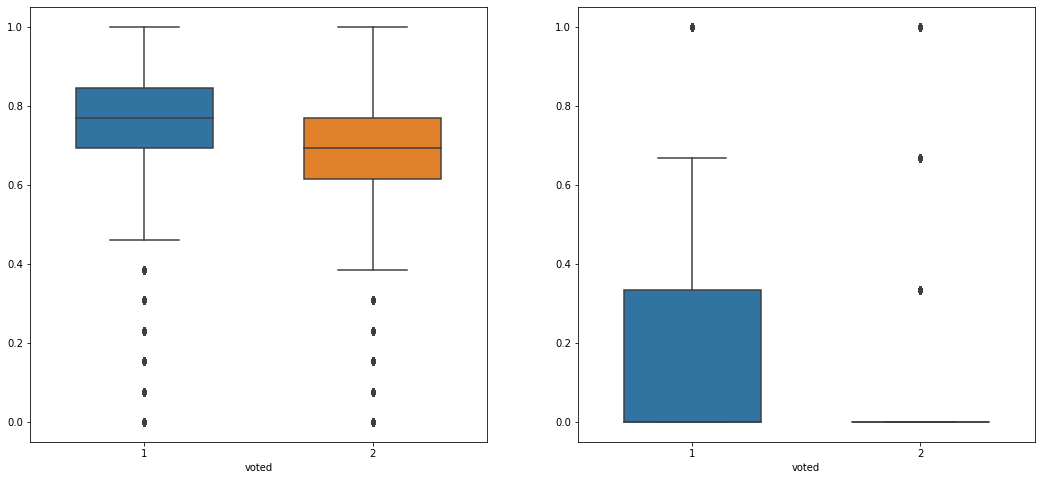

In [82]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x=data['voted'],y=wr_agg,ax=ax[0],width=0.6)
sns.boxplot(x=data['voted'],y=wf_agg,ax=ax[1],width=0.6)

<Figure size 1296x576 with 0 Axes>

<AxesSubplot:>

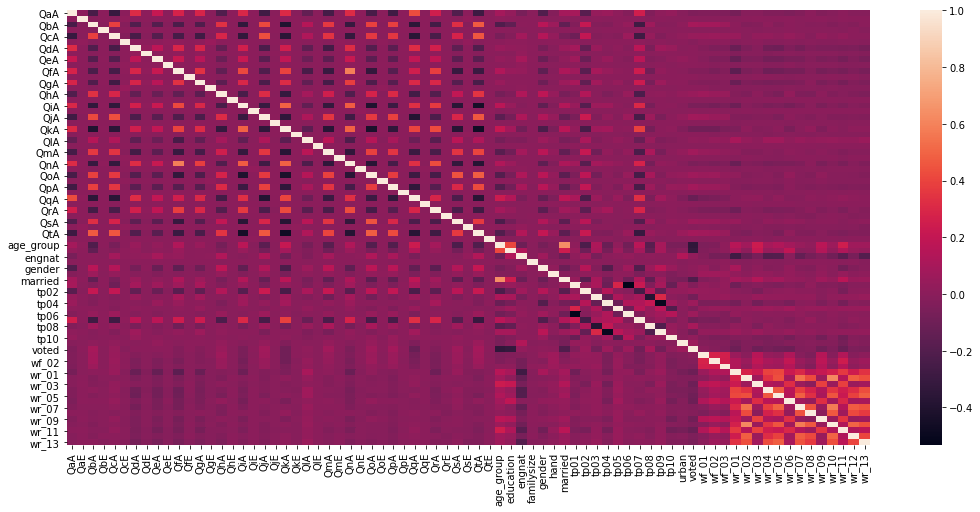

In [85]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr())

In [231]:
3+2

5

In [290]:
term = ['a','a','a','b','b','c','c','c']
count = ['1','1','1','1','1','1','1','1']

In [291]:
dff = pd.DataFrame({
    'term':term,
    'count':count
})

In [275]:
dff = dff.astype({'term':str,'count':str})

In [293]:
dff.groupby('term',as_index=False)['count'].sum()

AttributeError: 'Series' object has no attribute 'columns'